# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [21]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | flin flon
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | rio grande
Processing Record 6 of Set 1 | alaghsas
Processing Record 7 of Set 1 | san jose del guaviare
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | rome
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | guarapari
Processing Record 13 of Set 1 | jieshi
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | cadale
Processing Record 17 of Set 1 | san pedro pochutla
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | teruel
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | koszalin
Processing Record 22 of Set 1 | cargados carajos
City no

In [40]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [42]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,flin flon,54.7682,-101.8650,6.54,86,80,2.24,CA,1696486057
1,ilulissat,69.2167,-51.1000,-1.99,74,100,0.00,GL,1696486057
2,wailua homesteads,22.0669,-159.3780,25.24,90,100,2.06,US,1696486058
3,east london,-33.0153,27.9116,23.89,64,89,3.41,ZA,1696486058
4,rio grande,-32.0350,-52.0986,12.75,84,78,4.51,BR,1696486058


In [43]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv",index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,flin flon,54.7682,-101.8650,6.54,86,80,2.24,CA,1696486057
1,ilulissat,69.2167,-51.1000,-1.99,74,100,0.00,GL,1696486057
2,wailua homesteads,22.0669,-159.3780,25.24,90,100,2.06,US,1696486058
3,east london,-33.0153,27.9116,23.89,64,89,3.41,ZA,1696486058
4,rio grande,-32.0350,-52.0986,12.75,84,78,4.51,BR,1696486058


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

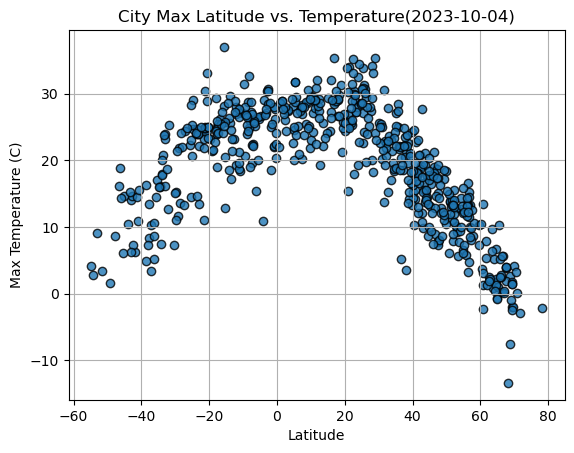

In [48]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Max Temp'],
    marker='o', 
    edgecolor='black', 
    linewidths=1, 
    alpha=0.8, 
    label='Cities'
)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature(%s)' % time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

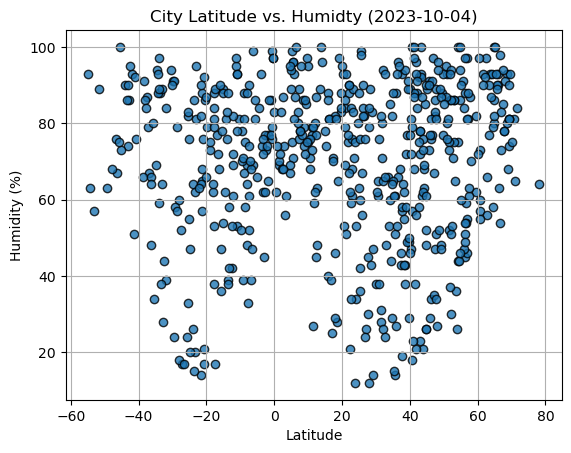

In [49]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Humidity'],
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,
    label='Cities'
)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidty (%s)' % time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

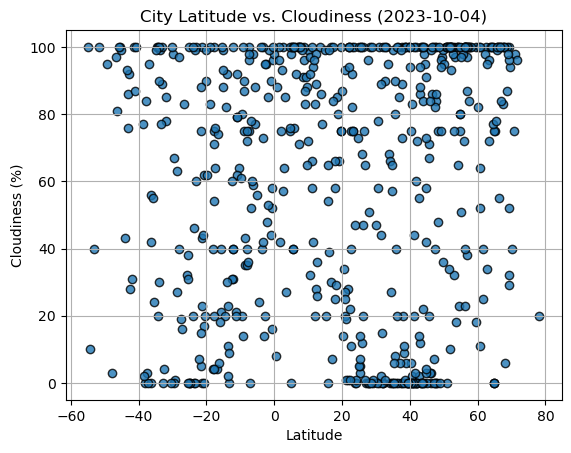

In [50]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Cloudiness'],
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,
    label='Cities'
)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

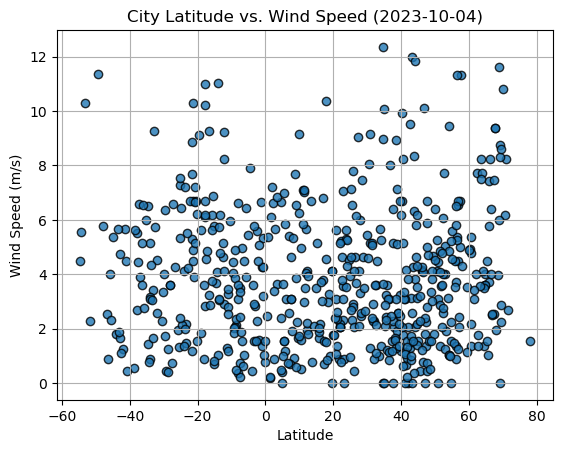

In [51]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Wind Speed'],
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,
    label='Cities'
)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def plot_linear_reg(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,flin flon,54.7682,-101.8650,6.54,86,80,2.24,CA,1696486057
1,ilulissat,69.2167,-51.1000,-1.99,74,100,0.00,GL,1696486057
2,wailua homesteads,22.0669,-159.3780,25.24,90,100,2.06,US,1696486058
5,alaghsas,17.0187,8.0168,28.81,25,7,6.80,NE,1696486058
6,san jose del guaviare,2.5729,-72.6459,24.34,87,100,0.89,CO,1696486059


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,east london,-33.0153,27.9116,23.89,64,89,3.41,ZA,1696486058
4,rio grande,-32.0350,-52.0986,12.75,84,78,4.51,BR,1696486058
9,puerto ayora,-0.7393,-90.3518,21.97,99,52,3.19,EC,1696486059
11,guarapari,-20.6667,-40.4975,24.38,92,62,7.20,BR,1696486060
13,waitangi,-43.9535,-176.5597,10.46,90,43,1.79,NZ,1696486060


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7471360539921852


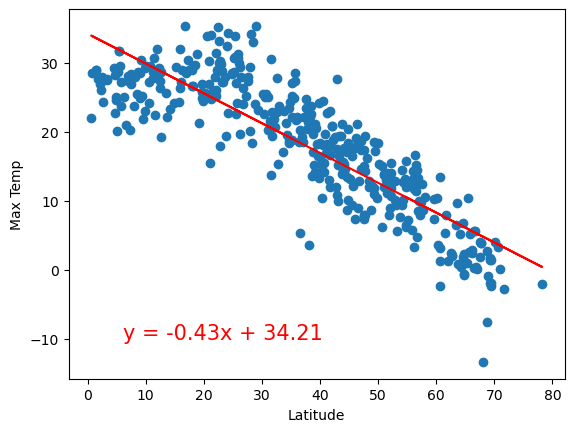

In [55]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plot_linear_reg(x_values, y_values, 'Max Temp',(6,-10))

The r-value is: 0.5108919977090763


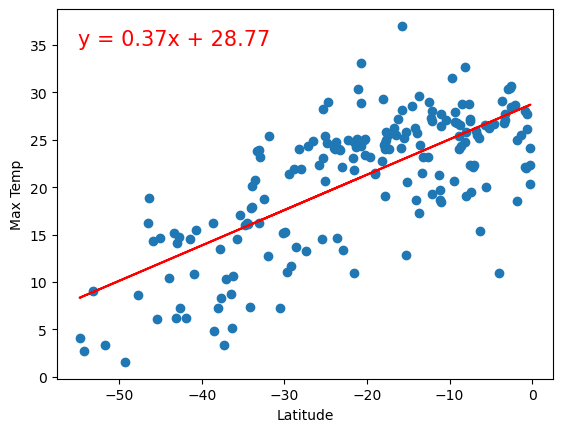

In [56]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_reg(x_values, y_values, 'Max Temp', (-55,35))

**Discussion about the linear relationship:** 
In the northern hemisphere, there is a negative correlation between the city's latitude and temperature (r=0.7) so higher the latitude is, lower the temperature is. In the southern hemisphere, there is a positive correlation between the city's latitude and temperature (r=0.5), so higher the latitude is, higher the temperature is.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0018764753769726955


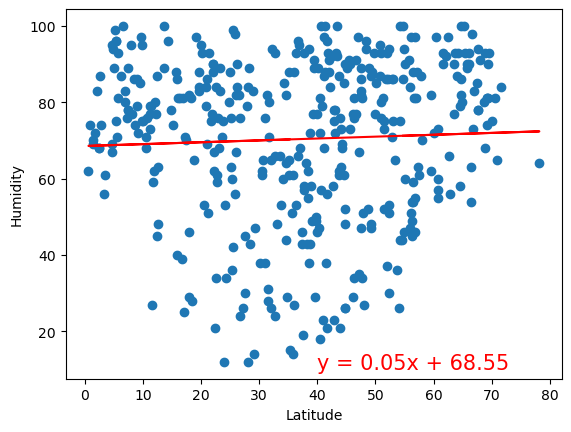

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_reg(x_values, y_values, 'Humidity',(40,10))

The r-value is: 0.00011751415865450623


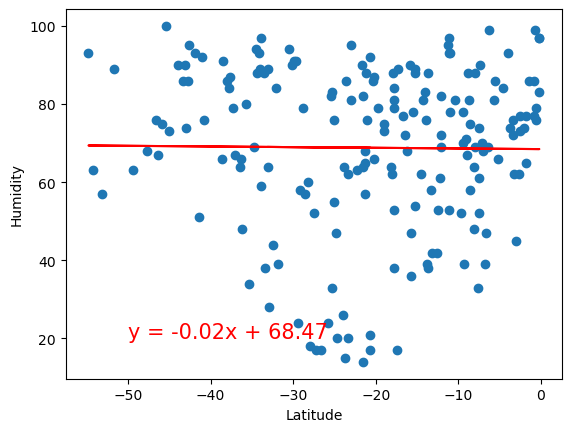

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_reg(x_values, y_values, 'Humidity',(-50,20))

**Discussion about the linear relationship:** There is a weak correlation between latitude and humidity, with low r values in the Northern Hemisphere (r=0.001) and in the Southern Hemisphere (r=0.0001).

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0032710387660653427


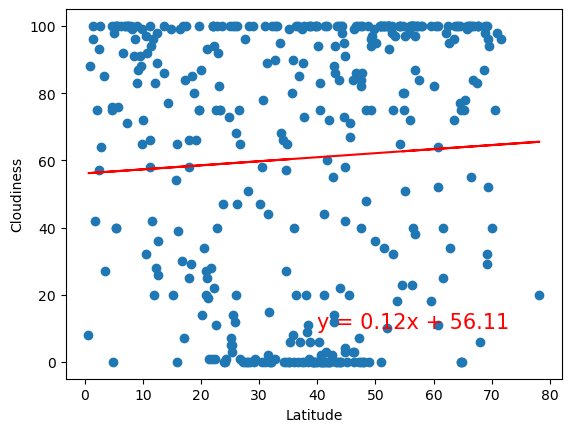

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_reg(x_values, y_values, 'Cloudiness',(40,10))

The r-value is: 2.411137551333131e-05


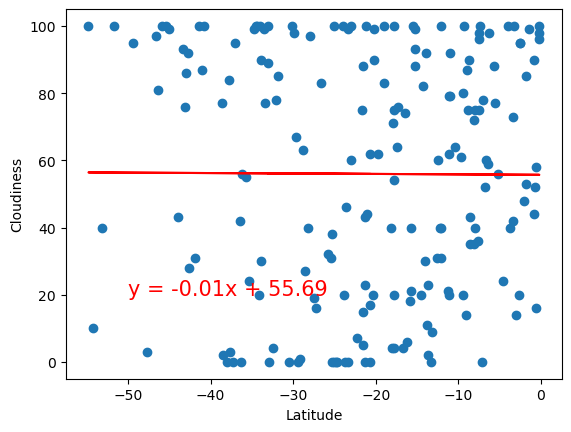

In [65]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_reg(x_values, y_values, 'Cloudiness',(-50,20))

**Discussion about the linear relationship:** There is a weak correlation between latitude and cloudiness, with low r values in the Northern Hemisphere (r=0.003) and in the Southern Hemisphere (r=2.4e-05).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.016692636579205784


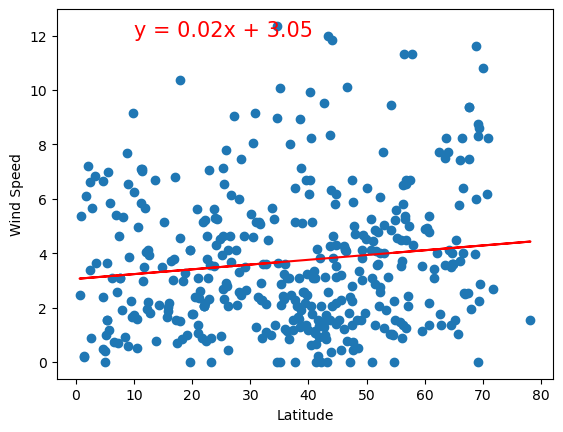

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_reg(x_values, y_values, 'Wind Speed',(10,12))

The r-value is: 0.007024071526244401


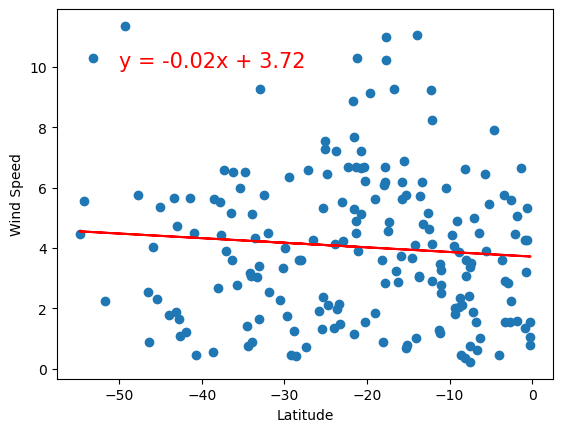

In [71]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_reg(x_values, y_values, 'Wind Speed',(-50,10))

**Discussion about the linear relationship:** There is a weak correlation between latitude and cloudiness, with low r values in the Northern Hemisphere (r=0.01) and in the Southern Hemisphere (r=0.007).